In [3]:
import numpy as np
import pandas as pd
import igraph
from rdkit import Chem
from rdkit.Chem.rdchem import RWMol
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True

In [41]:
def mol2graph(mol):
    atoms_info = [ (atom.GetIdx(), atom.GetAtomicNum(), atom.GetSymbol()) for atom in mol.GetAtoms()]
    bonds_info = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetBondTypeAsDouble()) for bond in mol.GetBonds()]
    graph = igraph.Graph()
    for atom_info in atoms_info:
        graph.add_vertex(atom_info[0], AtomicNum=atom_info[1], AtomicSymbole=atom_info[2])
    for bond_info in bonds_info:
        graph.add_edge(bond_info[0], bond_info[1], BondType=bond_info[2], BondTypeAsDouble=bond_info[3])
    return graph

def graph2mol(graph): 
    emol = RWMol()
    for v in graph.vs():
        emol.AddAtom(Chem.Atom(v["AtomicNum"]))
    for e in graph.es():
        emol.AddBond(e.source, e.target, e['BondType'])
    mol = emol.GetMol()
    return mol
        

In [49]:
mol = Chem.MolFromSmiles("C1OCCNC1C")
g=mol2graph(mol)

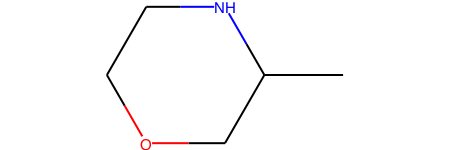

In [50]:
mol

In [51]:
g

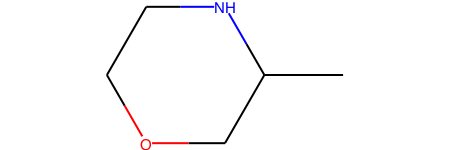

In [52]:
graph2mol(g)

In [53]:
from igraph import GraphBase
layout = g.layout_graphopt()

In [54]:
color_dict = {"C": "gray", "N": "blue", "O" :  "white" }
my_plot = igraph.Plot()
my_plot = igraph.Plot()
my_plot.add(g,layout=layout,bbox=(400,400),
             margin=90,
             vertex_color = [color_dict[atom] for atom in g.vs["AtomicSymbole"]],
             vertex_size = [ v.degree()*10 for v in g.vs ])
my_plot.show()